# Segmentation

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import sent_tokenize
%matplotlib inline

from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE

In [7]:
# Import transcript and segment into sentences 
def sentence_chunk_transcript(transcripts, name_variable='transcript', chunk_size=1):
    """ transcripts: must have two columns - episode_id and transcript
        chunk_size: number of sentences in chunk 
    """
    transcripts["sentence_token"] = transcripts[name_variable].apply(lambda x: sent_tokenize(x, language='english'))
    episode_ls = []
    transcript_ls = []
    sent_enum_ls = []
    for index, row in transcripts.iterrows():
        for i in range(0, len(row["sentence_token"]), chunk_size):
            episode_ls.append(row["episode_id"])
            transcript_ls.append(" ".join(row["sentence_token"][i:i+chunk_size]))
            sent_enum_ls.append(f"{i+1}")
    sentence_chunked_df = pd.DataFrame(data = {'episode_id': episode_ls, 'transcript_subset':transcript_ls, 'sentence_enumerated':sent_enum_ls})
    return sentence_chunked_df

In [20]:
# Load bertopic model and predict topic proba per sentence and put in martix

#Instantiate models
# trunc_svd = TruncatedSVD(n_components=50)
# T_SNE = TSNE(n_components=3, perplexity=1)

mod = BERTopic.load('BERT_mini')
docs = trans.transcript_subset.to_list()

# tsvd_embeddings = trunc_svd.fit_transform(embed_256)
# tsne_dimreduced_embeddings = T_SNE.fit_transform(X=tsvd_embeddings)
topics = mod.transform(docs, embed_256)

def predict_sent_topic(topic_model, transcript, sentence_model="all-MiniLM-L6-v2"):
    # Load model 
    model = BERTopic.load(topic_model)
    docs = transcript.to_list()
    sentence_model = SentenceTransformer(sentence_model)
    # create input data 
    enum_transcript = sentence_chunk_transcript(transcripts=transcript, chunk_size=1)

    embed_new_sents = sentence_model.encode(docs, convert_to_numpy=True)
    _, proba = model.transform(docs, embedding=embed_new_sents)
    
        

    

In [5]:
data = pd.read_csv('transcripts_sample.csv.gz', compression='gzip')[:1]
data.head()

,show_id,episode_id,transcript,avg_confidence,char_count,show_name,show_description,publisher,language,episode_name,episode_description,duration,show_id_trans,category,pubdate,word_count
0,show_74R2UD42MRDtmeCGCpXNHA,7tYqM5F5SKtt7lFgcimgAh,I'm Daniel Williams director of active chicks ...,0.850038,11270,Inspire By Dani - The Podcast,"Real and raw conversations on mental health, f...",Danielle Williams,['en'],The Best Advice My Mum Ever Gave Me,Today’s Episode I chat about what my mother sa...,13.96255,show_74R2UD42MRDtmeCGCpXNHA,Health & Fitness,NaN,2259


In [10]:
trans = sentence_chunk_transcript(data)
trans

,episode_id,transcript_subset,sentence_enumerated
0,7tYqM5F5SKtt7lFgcimgAh,I'm Daniel Williams director of active chicks ...,1
1,7tYqM5F5SKtt7lFgcimgAh,I'm also a mom to five wonderful and crazy kid...,2
2,7tYqM5F5SKtt7lFgcimgAh,This podcast is all about real and raw convers...,3
3,7tYqM5F5SKtt7lFgcimgAh,Welcome to the first official episode of the a...,4
4,7tYqM5F5SKtt7lFgcimgAh,There was so many topics of that I could start...,5
...,...,...,...
90,7tYqM5F5SKtt7lFgcimgAh,But if you could also share this with a friend...,91
91,7tYqM5F5SKtt7lFgcimgAh,That it just helps me to get the word out.,92
92,7tYqM5F5SKtt7lFgcimgAh,Alright.,93
93,7tYqM5F5SKtt7lFgcimgAh,I hope you have an awesome day.,94


In [15]:
trans.transcript_subset[0]

"I'm Daniel Williams director of active chicks Fitness and life coach."

In [43]:
mod = BERTopic.load('BERT_mini')
docs = trans.transcript_subset.to_list()

embed_256 = sentence_model.encode(docs, convert_to_numpy=True)
# tsvd_embeddings = trunc_svd.fit_transform(embed_256)
# tsne_dimreduced_embeddings = T_SNE.fit_transform(X=tsvd_embeddings)
topics, proba = mod.transform(docs, embed_256)

print(topics)

[-1, -1, -1, 1, -1, -1, 1, -1, -1, -1, 13, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 353, -1, -1, -1, -1, -1, -1, -1, 182, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 255, -1, -1, -1, -1, 74, 244, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, 465, -1, -1, -1, -1, -1, -1, 0, -1, -1, 79, 1, -1, 1, -1, -1, -1, -1, 1, 1, -1, -1, 1, -1, 1, 1, 1]


In [61]:
sentence_proba = pd.DataFrame(proba)
# sentence_proba.head(10)
sentence_proba.iloc[0:1, 270:280]

,270,271,272,273,274,275,276,277,278,279
0,1.468748e-70,1.304401e-70,5.743890e-66,1.239368e-70,1.320460e-70,1.411937e-70,1.261834e-70,2.628951e-29,0.132749,2.384059e-70


idxmax
    idxmax       max
0    278.0  0.132749
1    278.0  0.132749
2    564.0  0.843033
3      1.0  0.365293
4    190.0  0.125336
5     89.0  0.208253
6      1.0  0.028969
7    356.0  0.359377
8    507.0  0.007842
9     24.0  0.043719
10    13.0  0.033657
11   446.0  0.001018
12   297.0  0.764295
13    47.0  0.194036
14   587.0  0.985416
15   255.0  0.803048
16   117.0  0.549348
17   578.0  0.824118
18   504.0  0.755607
19    13.0  0.077791
20   494.0  0.404881
21   297.0  0.193936
22   568.0  0.795918
23   353.0  0.003009
24   518.0  0.005536


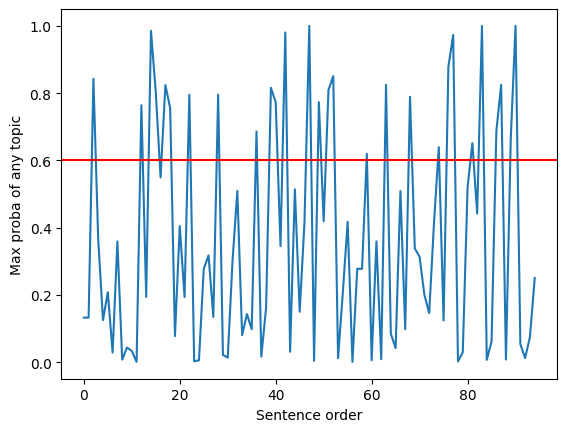

In [68]:
sents = sentence_proba.agg(['idxmax', 'max'], axis=1)
print(sents.columns[0])
print(sents[:25])
sns.lineplot(sents[sents.columns[1]])
plt.ylabel('Max proba of any topic')
plt.xlabel('Sentence order')
plt.axhline(0.6, color='r')
plt.show()

In [70]:
print(len(sents[sents.columns[0]].value_counts()))
sents[sents.columns[0]].value_counts()  

59


1.0      13
69.0      4
255.0     3
465.0     3
13.0      3
264.0     3
297.0     3
278.0     2
113.0     2
88.0      2
373.0     2
353.0     2
504.0     2
568.0     2
356.0     2
89.0      2
190.0     2
541.0     2
311.0     1
586.0     1
609.0     1
496.0     1
123.0     1
597.0     1
425.0     1
531.0     1
17.0      1
472.0     1
549.0     1
277.0     1
79.0      1
569.0     1
0.0       1
523.0     1
405.0     1
501.0     1
544.0     1
62.0      1
244.0     1
518.0     1
507.0     1
24.0      1
446.0     1
47.0      1
587.0     1
117.0     1
578.0     1
494.0     1
182.0     1
74.0      1
577.0     1
172.0     1
564.0     1
52.0      1
543.0     1
104.0     1
480.0     1
137.0     1
334.0     1
Name: idxmax, dtype: int64